In [2]:
import json
with open('pdb_val_output_last_two_years_full', 'r') as file:
    data = json.load(file)

In [3]:
import pandas as pd

def parse_data(data):
    """
    Parse JSON data into pandas DataFrames.

    Args:
        data (dict): Loaded JSON data.

    Returns:
        tuple: DataFrames for structures, chains, and interfaces.
    """
    structures = []
    chains = []
    interfaces = []

    structure_data = data.get('structure_data', {})
    
    for structure_id, structure_info in structure_data.items():
        # Structure-level data
        structures.append({
            'structure_id': structure_id,
            'release_date': structure_info.get('release_date'),
            'resolution': structure_info.get('resolution'),
            'token_count': structure_info.get('token_count')
        })
        
        # Chains data
        for chain_id, chain_info in structure_info.get('chains', {}).items():
            chains.append({
                'structure_id': structure_id,
                'chain_id': chain_id,
                'label_asym_id': chain_info.get('label_asym_id'),
                'auth_asym_id': chain_info.get('auth_asym_id'),
                'entity_id': chain_info.get('entity_id'),
                'molecule_type': chain_info.get('molecule_type'),
                'reference_mol_id': chain_info.get('reference_mol_id'),
                'alignment_representative_id': chain_info.get('alignment_representative_id'),
                'cluster_id': chain_info.get('cluster_id'),
                'cluster_size': chain_info.get('cluster_size'),
                'monomer_high_homology': chain_info.get('monomer_high_homology'),
                'ligand_high_homology': chain_info.get('ligand_high_homology'),
                'ligand_not_fit': chain_info.get('ligand_not_fit'),
                'num_residues_contact': chain_info.get('num_residues_contact')
            })
        
        # Interfaces data
        for interface_id, interface_info in structure_info.get('interfaces', {}).items():
            interfaces.append({
                'structure_id': structure_id,
                'interface_id': interface_id,
                'cluster_id': interface_info.get('cluster_id'),
                'cluster_size': interface_info.get('cluster_size'),
                'interface_high_homology': interface_info.get('interface_high_homology')
            })

    structures_df = pd.DataFrame(structures)
    chains_df = pd.DataFrame(chains)
    interfaces_df = pd.DataFrame(interfaces)

    print("DataFrames created:")
    print(f"Structures: {structures_df.shape[0]} records")
    print(f"Chains: {chains_df.shape[0]} records")
    print(f"Interfaces: {interfaces_df.shape[0]} records")

    return structures_df, chains_df, interfaces_df

if data:
    structures_df, chains_df, interfaces_df = parse_data(data)


DataFrames created:
Structures: 10795 records
Chains: 39913 records
Interfaces: 44133 records


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


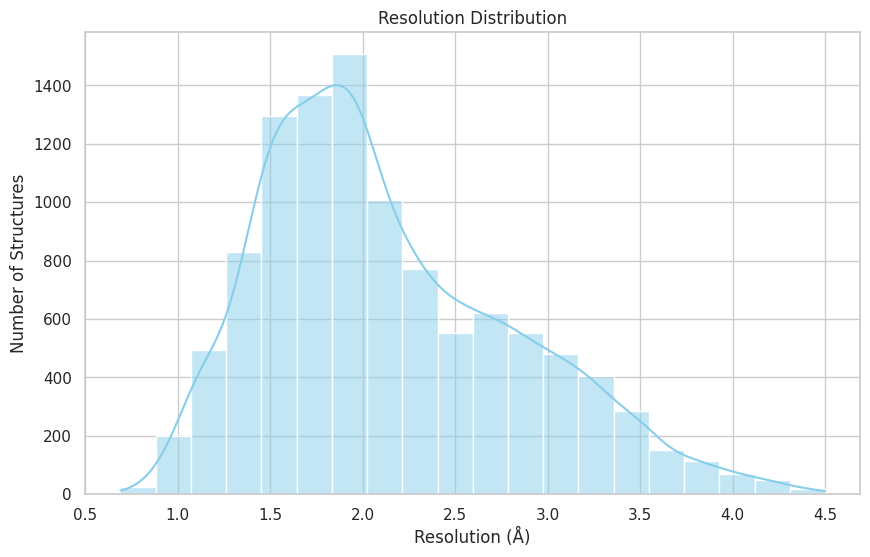

In [5]:
def plot_resolution_distribution(structures_df):
    plt.figure(figsize=(10, 6))
    sns.histplot(structures_df['resolution'].dropna(), bins=20, kde=True, color='skyblue')
    plt.title('Resolution Distribution')
    plt.xlabel('Resolution (Å)')
    plt.ylabel('Number of Structures')
    plt.show()

plot_resolution_distribution(structures_df)


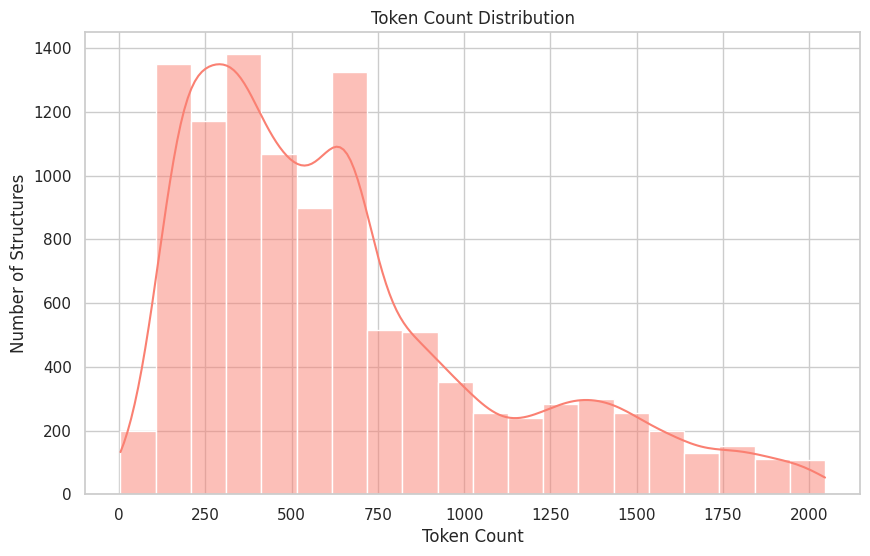

In [6]:
def plot_token_count_distribution(structures_df):
    plt.figure(figsize=(10, 6))
    sns.histplot(structures_df['token_count'].dropna(), bins=20, kde=True, color='salmon')
    plt.title('Token Count Distribution')
    plt.xlabel('Token Count')
    plt.ylabel('Number of Structures')
    plt.show()

plot_token_count_distribution(structures_df)


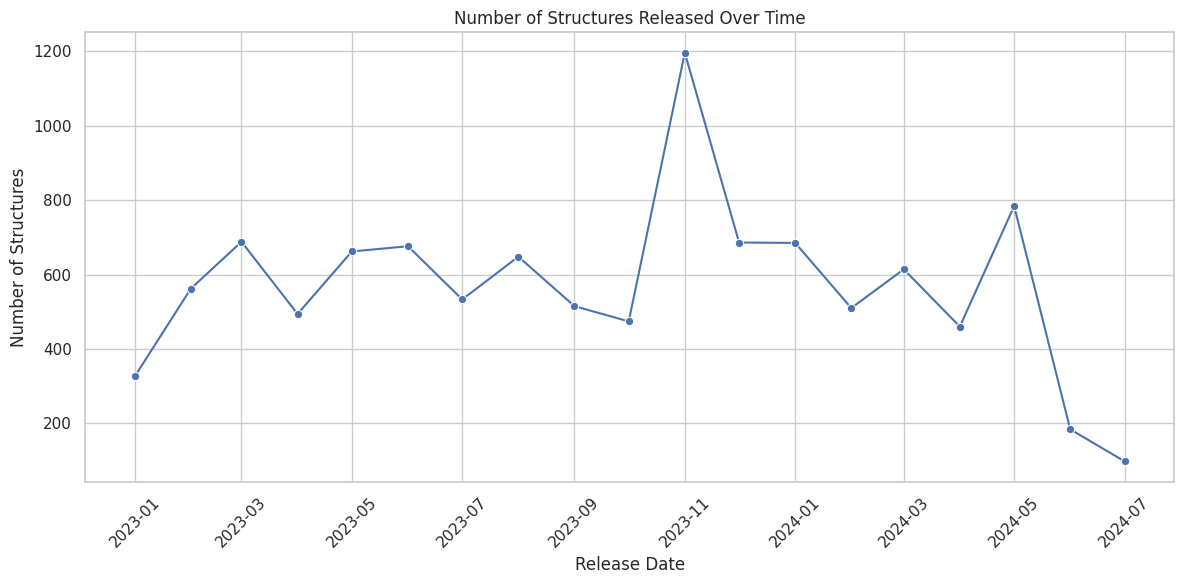

In [7]:
def plot_structures_over_time(structures_df):
    # Convert release_date to datetime
    structures_df['release_date'] = pd.to_datetime(structures_df['release_date'])
    
    # Group by year and month
    structures_over_time = structures_df.groupby(structures_df['release_date'].dt.to_period('M')).size().reset_index(name='count')
    structures_over_time['release_date'] = structures_over_time['release_date'].dt.to_timestamp()
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=structures_over_time, x='release_date', y='count', marker='o')
    plt.title('Number of Structures Released Over Time')
    plt.xlabel('Release Date')
    plt.ylabel('Number of Structures')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_structures_over_time(structures_df)


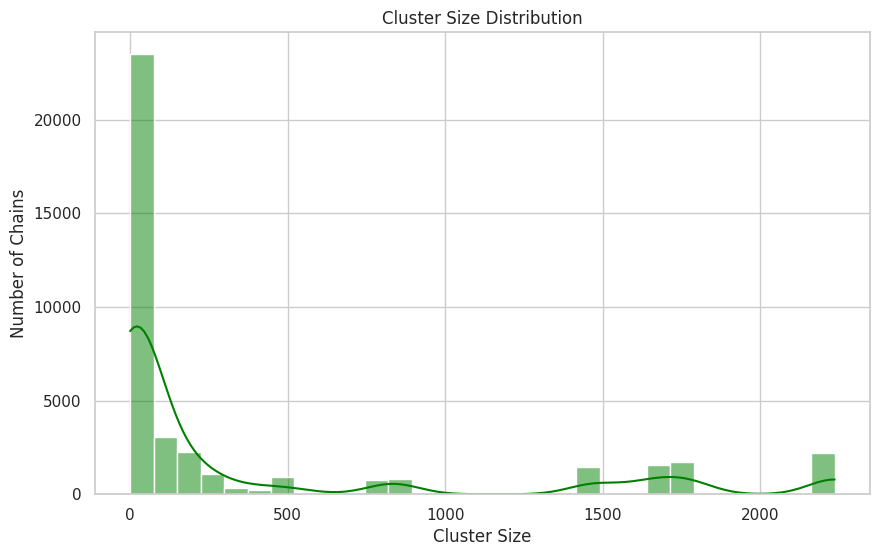

In [8]:
def plot_cluster_size_distribution(chains_df):
    plt.figure(figsize=(10, 6))
    sns.histplot(chains_df['cluster_size'].dropna(), bins=30, kde=True, color='green')
    plt.title('Cluster Size Distribution')
    plt.xlabel('Cluster Size')
    plt.ylabel('Number of Chains')
    plt.show()

plot_cluster_size_distribution(chains_df)


/pmglocal/chk2153/tmp/ipykernel_2546868/3786182024.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=chains_df, x='molecule_type', palette='pastel')


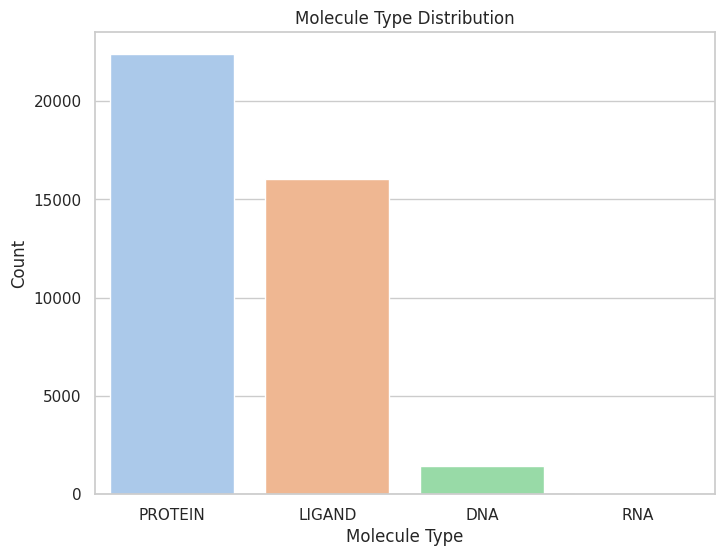

In [9]:
def plot_molecule_type_distribution(chains_df):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=chains_df, x='molecule_type', palette='pastel')
    plt.title('Molecule Type Distribution')
    plt.xlabel('Molecule Type')
    plt.ylabel('Count')
    plt.show()

plot_molecule_type_distribution(chains_df)


/pmglocal/chk2153/tmp/ipykernel_2546868/1890131574.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=homology_counts, x='ligand_high_homology', y='count', palette='viridis')


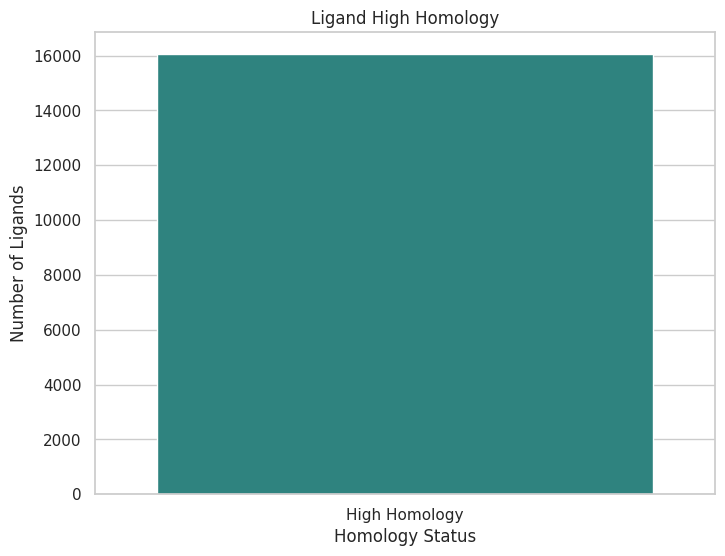

In [10]:
def plot_ligand_high_homology(chains_df):
    ligands = chains_df[chains_df['molecule_type'] == 'LIGAND']
    homology_counts = ligands['ligand_high_homology'].value_counts().reset_index()
    homology_counts.columns = ['ligand_high_homology', 'count']
    homology_counts['ligand_high_homology'] = homology_counts['ligand_high_homology'].map({1: 'High Homology', 0: 'Low/No Homology'})
    
    plt.figure(figsize=(8, 6))
    sns.barplot(data=homology_counts, x='ligand_high_homology', y='count', palette='viridis')
    plt.title('Ligand High Homology')
    plt.xlabel('Homology Status')
    plt.ylabel('Number of Ligands')
    plt.show()

plot_ligand_high_homology(chains_df)


/pmglocal/chk2153/tmp/ipykernel_2546868/2923230735.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=homology_counts, x='interface_high_homology', y='count', palette='magma')


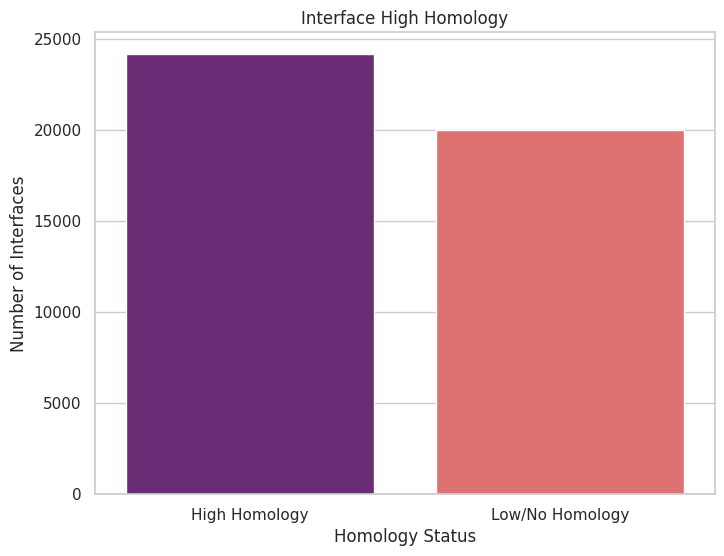

In [11]:
def plot_interface_high_homology(interfaces_df):
    if interfaces_df.empty:
        print("No interface data available to plot.")
        return
    
    homology_counts = interfaces_df['interface_high_homology'].value_counts().reset_index()
    homology_counts.columns = ['interface_high_homology', 'count']
    homology_counts['interface_high_homology'] = homology_counts['interface_high_homology'].map({1: 'High Homology', 0: 'Low/No Homology'})
    
    plt.figure(figsize=(8, 6))
    sns.barplot(data=homology_counts, x='interface_high_homology', y='count', palette='magma')
    plt.title('Interface High Homology')
    plt.xlabel('Homology Status')
    plt.ylabel('Number of Interfaces')
    plt.show()

plot_interface_high_homology(interfaces_df)


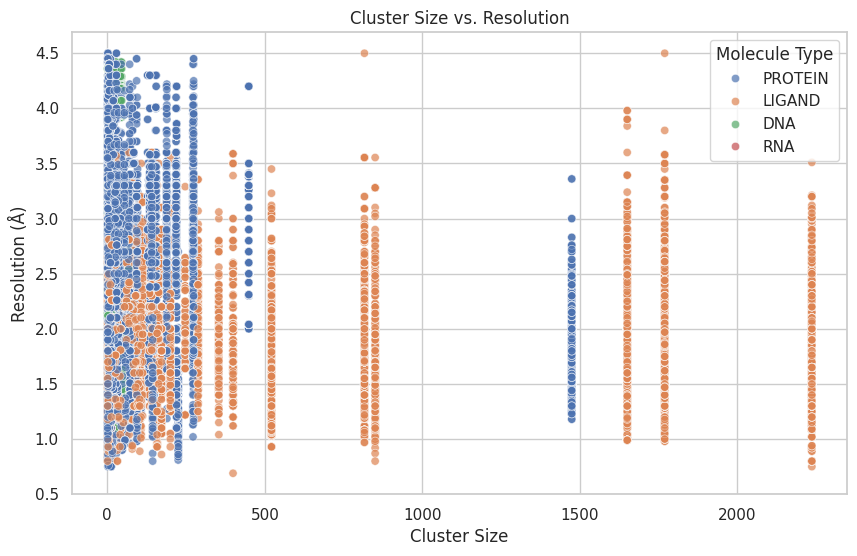

In [12]:
def plot_cluster_size_vs_resolution(chains_df, structures_df):
    merged_df = pd.merge(chains_df, structures_df, on='structure_id', how='left')
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=merged_df, x='cluster_size', y='resolution', hue='molecule_type', alpha=0.7)
    plt.title('Cluster Size vs. Resolution')
    plt.xlabel('Cluster Size')
    plt.ylabel('Resolution (Å)')
    plt.legend(title='Molecule Type')
    plt.show()

plot_cluster_size_vs_resolution(chains_df, structures_df)


In [13]:
def determine_interface_types(chains_df, interfaces_df):
    """
    Determine the type of each interface based on the molecule types of involved chains.
    
    Args:
        chains_df (pd.DataFrame): DataFrame containing chain information.
        interfaces_df (pd.DataFrame): DataFrame containing interface information.
    
    Returns:
        pd.DataFrame: Updated interfaces_df with a new column 'interface_type'.
    """
    chain_type_map = chains_df.set_index(['structure_id', 'chain_id'])['molecule_type'].to_dict()
    
    interface_types = []
    
    for idx, row in interfaces_df.iterrows():
        structure_id = row['structure_id']
        interface_id = row['interface_id']
        
        chain_ids = interface_id.split('_')
        
        molecule_types = []
        for chain_id in chain_ids:
            key = (structure_id, chain_id)
            molecule_type = chain_type_map.get(key, 'UNKNOWN')
            molecule_types.append(molecule_type)
        
        if len(molecule_types) == 2:
            type_a, type_b = molecule_types
            sorted_types = sorted([type_a, type_b])
            interface_type = f"{sorted_types[0]}-{sorted_types[1]}"
        else:
            interface_type = '-'.join(sorted(molecule_types))
        
        interface_types.append(interface_type)
    
    interfaces_df = interfaces_df.copy()
    interfaces_df['interface_type'] = interface_types
    
    return interfaces_df

interfaces_df = determine_interface_types(chains_df, interfaces_df)


In [14]:
def count_interface_types(interfaces_df):
    """
    Count the number of each interface type.
    
    Args:
        interfaces_df (pd.DataFrame): DataFrame containing interface information with 'interface_type'.
    
    Returns:
        pd.DataFrame: DataFrame with 'interface_type' and their corresponding counts.
    """
    interface_counts = interfaces_df['interface_type'].value_counts().reset_index()
    interface_counts.columns = ['interface_type', 'count']
    
    return interface_counts

interface_counts_df = count_interface_types(interfaces_df)
print(interface_counts_df)


    interface_type  count
0   LIGAND-PROTEIN  19085
1  PROTEIN-PROTEIN  17233
2    LIGAND-LIGAND   3477
3      DNA-PROTEIN   2304
4          DNA-DNA   1250
5       DNA-LIGAND    708
6      PROTEIN-RNA     46
7          DNA-RNA     14
8       LIGAND-RNA     11
9          RNA-RNA      5


/pmglocal/chk2153/tmp/ipykernel_2546868/3251779053.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=interface_counts_df, x='interface_type', y='count', palette='Set2')


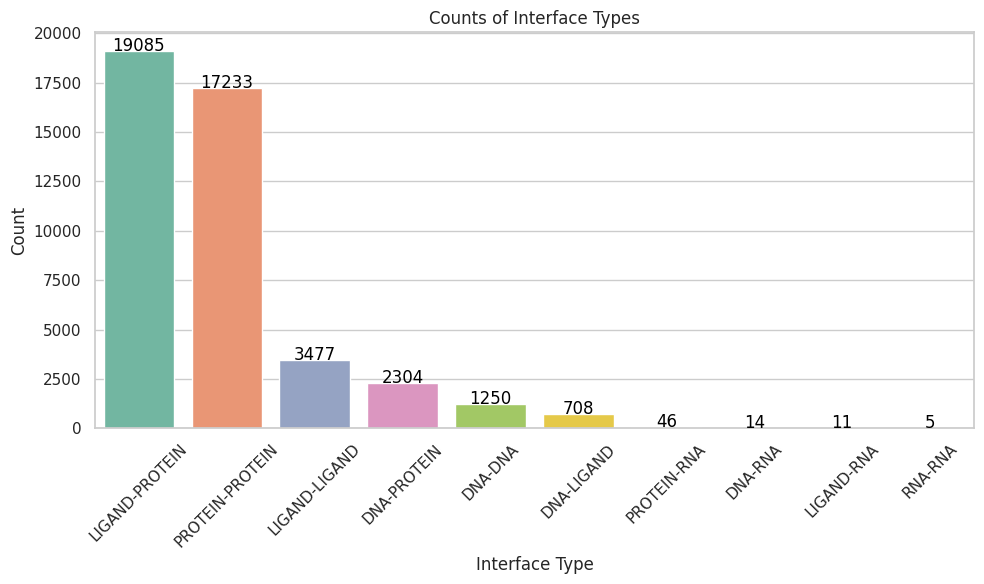

In [15]:
def plot_interface_type_counts(interface_counts_df):
    """
    Plot the counts of each interface type.
    
    Args:
        interface_counts_df (pd.DataFrame): DataFrame with 'interface_type' and 'count'.
    """
    plt.figure(figsize=(10, 6))
    sns.barplot(data=interface_counts_df, x='interface_type', y='count', palette='Set2')
    plt.title('Counts of Interface Types')
    plt.xlabel('Interface Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    for index, row in interface_counts_df.iterrows():
        plt.text(index, row['count'], row['count'], color='black', ha="center")
    
    plt.tight_layout()
    plt.show()

plot_interface_type_counts(interface_counts_df)


   ligand_not_fit  count status
0               0  16049    Fit


/pmglocal/chk2153/tmp/ipykernel_2546868/4121318091.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ligands['ligand_not_fit'] = ligands['ligand_not_fit'].fillna(0).astype(int)
/pmglocal/chk2153/tmp/ipykernel_2546868/4121318091.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fit_status_counts, x='status', y='count', palette='Set2')


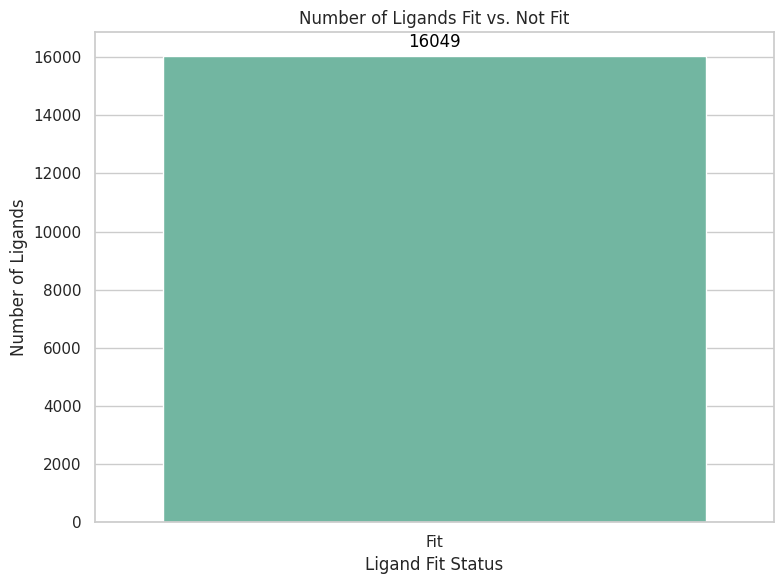

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_number_of_ligands_not_fit(chains_df):
    """
    Plot the number of ligands that did not fit vs. those that did fit.
    
    Args:
        chains_df (pd.DataFrame): DataFrame containing chain information.
    """
    ligands = chains_df[chains_df['molecule_type'] == 'LIGAND']
    ligands['ligand_not_fit'] = ligands['ligand_not_fit'].fillna(0).astype(int)
    fit_status_counts = ligands['ligand_not_fit'].value_counts().reset_index()
    fit_status_counts.columns = ['ligand_not_fit', 'count']
    fit_status_counts['status'] = fit_status_counts['ligand_not_fit'].map({1: 'Not Fit', 0: 'Fit'})
    print(fit_status_counts)

    plt.figure(figsize=(8, 6))
    sns.barplot(data=fit_status_counts, x='status', y='count', palette='Set2')
    plt.title('Number of Ligands Fit vs. Not Fit')
    plt.xlabel('Ligand Fit Status')
    plt.ylabel('Number of Ligands')
    for index, row in fit_status_counts.iterrows():
        plt.text(index, row['count'] + max(fit_status_counts['count']) * 0.01, 
                 row['count'], color='black', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

plot_number_of_ligands_not_fit(chains_df)
